## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns  

## Importing the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV\7.xor.csv",header=None) 
df.head() 

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [3]:
#renaming columns properly
df.columns=["f_1","f_2","label"] 
df.head() 

,f_1,f_2,label
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
df["label"]=np.where(df["label"]==-1.0,0,1)
df.head() 

,f_1,f_2,label
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


In [6]:
df["label"].value_counts() 

0    260
1    240
Name: label, dtype: int64

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     500 non-null    float64
 1   f_2     500 non-null    float64
 2   label   500 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.9 KB


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='f_1'>

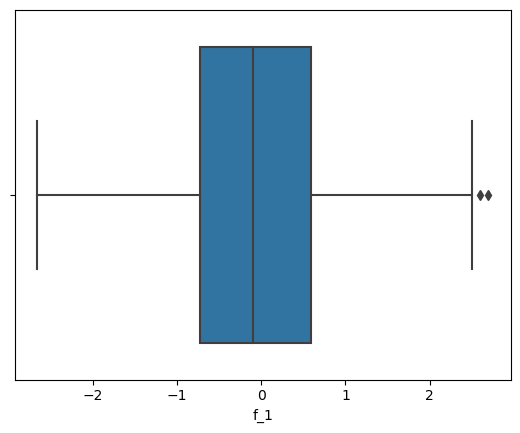

In [8]:
sns.boxplot(df["f_1"])  

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='f_2'>

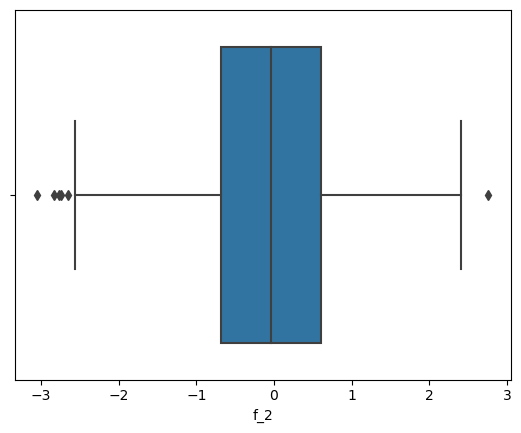

In [9]:
sns.boxplot(df["f_2"]) 

## Identifying the input and output features 

In [10]:
x=df[["f_1","f_2"]] 
y=df["label"].astype(int)

In [11]:
x.head()  

,f_1,f_2
0,1.764052,0.400157
1,0.978738,2.240893
2,1.867558,-0.977278
3,0.950088,-0.151357
4,-0.103219,0.410599


In [12]:
y.head()  

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int32

## Spliting the data into train and test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [14]:
x_train.shape  

(450, 2)

In [15]:
x_test.shape 

(50, 2)

## Standardizing input features 

In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

## Building the Logical Structure

In [20]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [21]:

model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 

In [22]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 18)                378       
                                                                 
 dense_2 (Dense)             (None, 16)                304       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 759 (2.96 KB)
Trainable params: 759 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=35,validation_split=0.1) 

Epoch 1/35
41/41 [==============================] - 3s 21ms/step - loss: 0.7706 - accuracy: 0.5160 - val_loss: 0.7399 - val_accuracy: 0.5556
Epoch 2/35
41/41 [==============================] - 0s 6ms/step - loss: 0.7411 - accuracy: 0.5259 - val_loss: 0.7238 - val_accuracy: 0.6000
Epoch 3/35
41/41 [==============================] - 0s 6ms/step - loss: 0.7224 - accuracy: 0.5704 - val_loss: 0.7124 - val_accuracy: 0.6444
Epoch 4/35
41/41 [==============================] - 0s 7ms/step - loss: 0.7081 - accuracy: 0.6840 - val_loss: 0.7034 - val_accuracy: 0.6444
Epoch 5/35
41/41 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.7012 - val_loss: 0.6963 - val_accuracy: 0.7111
Epoch 6/35
41/41 [==============================] - 0s 10ms/step - loss: 0.6864 - accuracy: 0.7901 - val_loss: 0.6877 - val_accuracy: 0.6889
Epoch 7/35
41/41 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.8247 - val_loss: 0.6777 - val_accuracy: 0.6889
Epoch 8/35
41/41 [

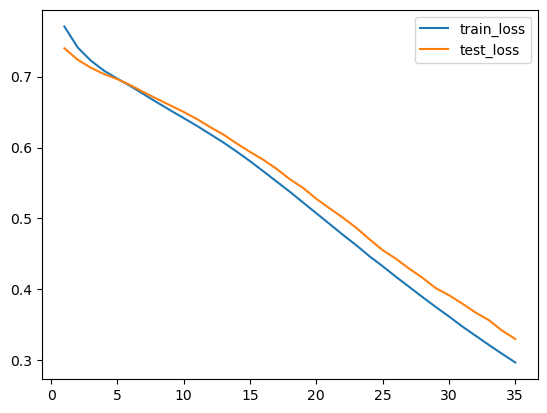

In [24]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [25]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 6ms/step


array([[0.07338443],
       [0.5661809 ],
       [0.74458015],
       [0.5293699 ],
       [0.33532658],
       [0.97341335],
       [0.7824638 ],
       [0.336249  ],
       [0.0922411 ],
       [0.8350027 ],
       [0.46242407],
       [0.63904566],
       [0.13174681],
       [0.02926717],
       [0.65218043],
       [0.11648268],
       [0.06301559],
       [0.45939097],
       [0.7246574 ],
       [0.00273395],
       [0.2236344 ],
       [0.09785229],
       [0.32965145],
       [0.65586436],
       [0.31865036],
       [0.87171733],
       [0.94168633],
       [0.19037451],
       [0.02919729],
       [0.8949513 ],
       [0.83484644],
       [0.9994085 ],
       [0.5171691 ],
       [0.20256358],
       [0.16950835],
       [0.10061243],
       [0.4957673 ],
       [0.01371415],
       [0.00611761],
       [0.10860023],
       [0.09597095],
       [0.8452686 ],
       [0.96007615],
       [0.31787622],
       [0.7561829 ],
       [0.04064464],
       [0.78716946],
       [0.943

In [26]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]])

## Evaluating the model 

0.94


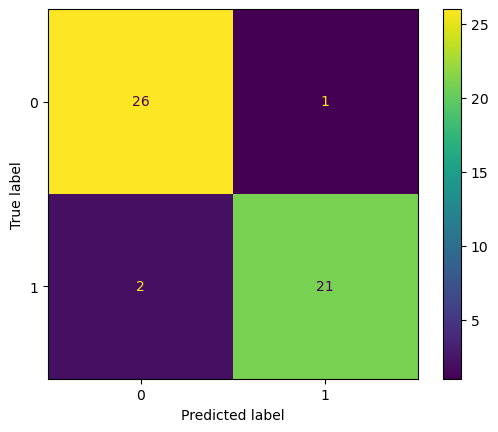

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

**Observation:** Diagonal element values are as highly as possible.So, the model predictions are accurate.

## PLOTING THE DECISION SURFACE 

In [28]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 24s 2ms/step


<AxesSubplot:>

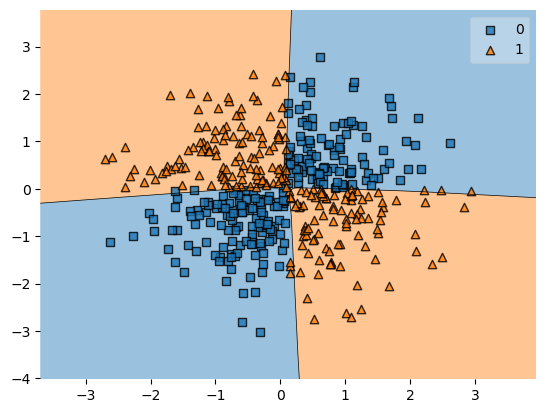

In [29]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

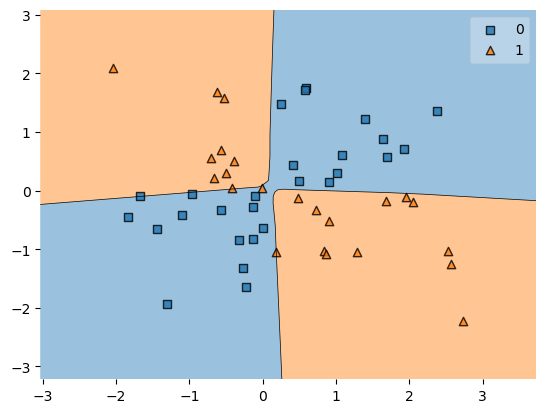

In [30]:
plot_decision_regions(x_test,y_test.values,clf=model) 

## **Conclusions:**

- This neural network model achieves an accuracy of 94%.
 
#### The model architecture consists of 3 hidden layers with the following specifications:

- In the first hidden layer, there are 20 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the second hidden layer, there are 18 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the third hidden layer, there are 16 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.

- The output layer uses the sigmoid activation function.


#### Overall, this neural network model architecture and training configuration achieve an accuracy of 94%.   